In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2024-10-10 08:21:00.978436: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 08:21:00.981398: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 08:21:00.990685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 08:21:01.006026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 08:21:01.010360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 08:21:01.020976: I tensorflow/core/platform/cpu_feature_gu

In [2]:
#train_btc= pd.read_csv('dataset.csv')
ETH= pd.read_csv('ETH-USD.csv')

In [3]:
ETH.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
ETH.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2086,2023-07-27,1872.086304,1885.591553,1855.321533,1860.357178,1860.357178,4291339248
2087,2023-07-28,1860.702515,1881.457275,1857.048950,1874.744873,1874.744873,3800973336
2088,2023-07-29,1874.560425,1885.529297,1870.333862,1881.068848,1881.068848,2497302218
2089,2023-07-30,1880.871582,1884.144165,1851.728027,1861.643799,1861.643799,4003005547
2090,2023-07-31,1861.755249,1875.629395,1851.915405,1856.162354,1856.162354,4391613314


In [5]:
ETH["Date"]=pd.to_datetime(ETH["Date"])
ETH.set_index('Date', inplace=True)

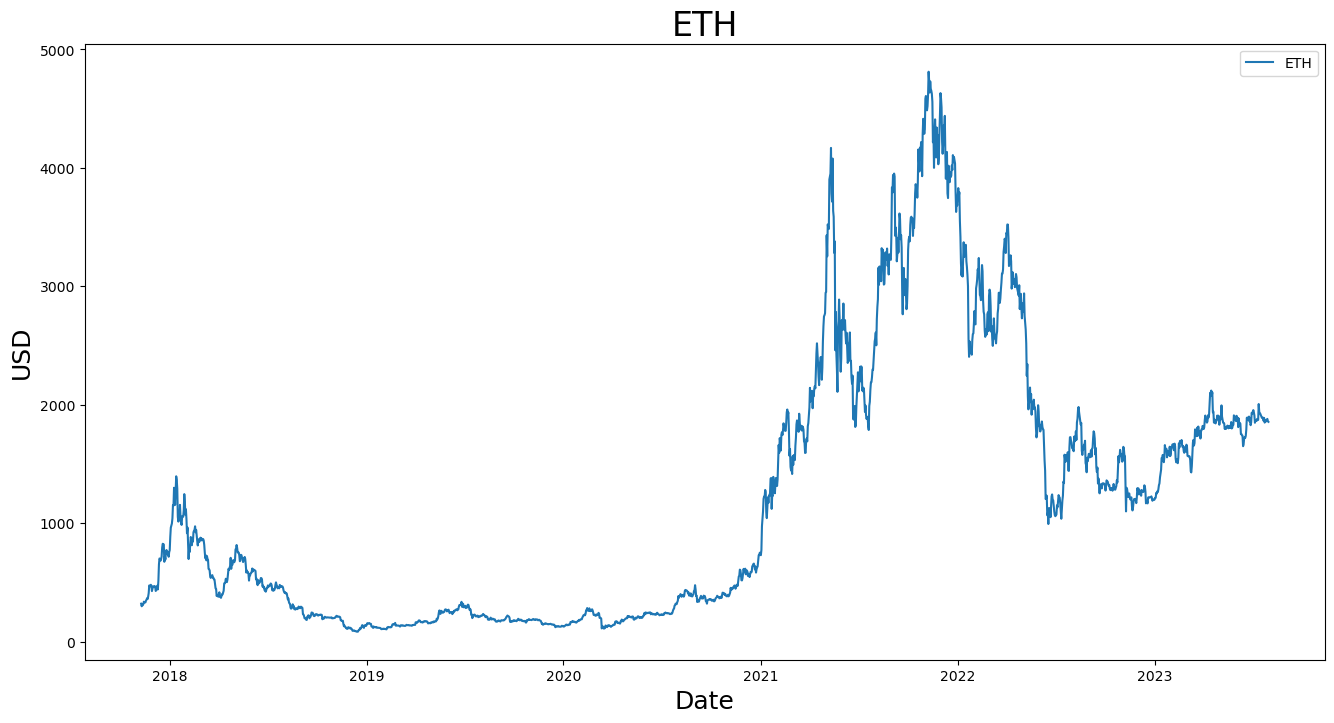

In [6]:
plt.figure(figsize=(16,8))
plt.title('ETH', fontsize=24)
#plt.plot(train_btc['Close'], label= "BTC")
plt.plot(ETH['Close'], label="ETH")
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.legend()
plt.show()

In [7]:
data = ETH.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1673

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
ETH_training_scaled=sc.fit_transform(dataset)

In [9]:
train_data = ETH_training_scaled[0:training_data_len, :]

In [10]:
x_train_ETH = []
y_train_ETH = []
for i in range(80, len(train_data)):
    x_train_ETH.append(train_data[i-80:i, 0])
    y_train_ETH.append(train_data[i, 0])
x_train_ETH,y_train_ETH=np.array(x_train_ETH), np.array(y_train_ETH)

In [ ]:
x_train_BTC = np.reshape(x_train_BTC, (x_train_BTC.shape[0],x_train_BTC.shape[1], 1))

In [ ]:
train_data = ETH_training_scaled[0:training_data_len, :]

In [11]:
x_train_ETH = np.reshape(x_train_ETH, (x_train_ETH.shape[0],x_train_ETH.shape[1], 1))

In [12]:
test_data = ETH_training_scaled[training_data_len- 60: ,:]
X_test = []
y_test = dataset[training_data_len: ,:]
for i in range(80, len(test_data)):
  X_test.append(test_data[i-80 : i, 0])

In [13]:
X_test = np.array(X_test)

In [14]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
from tensorflow.keras import models, layers, Sequential

In [19]:
Reg= Sequential()
Reg.add(layers.LSTM(5y_test.shape0, return_sequences=True, input_shape= (x_train_ETH.shape[1], 1)))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.Dense(1))

I0000 00:00:1728563153.007149   10489 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-10 08:25:53.007828: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/shegun/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
Reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 80, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 80, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Reg.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
history = Reg.fit(x_train_ETH, y_train_ETH, batch_size=32,epochs=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0301


In [23]:
predictions_1 = Reg.predict(X_test)
predictions_1 = sc.inverse_transform(predictions_1)
len(predictions_1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


398